Modèle de classification d'image 

Détecte soit

-absence de personne

--personne heureux 

-personne triste

-personne neutre

ordre ['PersonneHeureuse', 'PersonneTriste', 'PersonneNeutre', 'AbsencePersonne']

In [ ]:
#partie vrai code
import os, sys
from google.colab import drive   
drive.mount('/content/gdrive')  

os.chdir("/content/gdrive/MyDrive/ClassificateurDimageCNN2")  #sert a définir le chemin ou le dossier de travail dans google drive. 
sys.path.append("/content/gdrive/MyDrive/ClassificateurDimageCNN2") #sert a définir le chemin ou le dossier de travail dans google drive. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

Mounted at /content/gdrive


In [ ]:
#partie vrai code
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

installation de tensorflow et des ressource qu'il lui faut.

In [ ]:
#partie exemple
!pip list   #utile si ya des bugs de version ac tensorflow ou autre 
# sa permet de savoir la version et dinstaller une autre version si sa bug mais sur google colab dhabitute tout marche

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis  

In [ ]:
#partie vrai code
import tensorflow as tf
import os

In [ ]:
#partie vrai code
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)  #cela empeche un erreur de memoire insufisante en limitant la croissance de la memoire

cela aide a prévenir une erreur oom ou une erreur de mémoire insufisante

**2. Supprimer les images douteuses**

un truc pour entrainer des modèle rapidement est d'utiliser l'extension chrome download all image pour recuperer des image rapidement

In [ ]:
#partie vrai code
import cv2
import imghdr

In [ ]:
#partie vrai code
data_dir = '/content/gdrive/MyDrive/ClassificateurDimageCNN2' 

In [ ]:
#partie exemple
os.listdir('/content/gdrive/MyDrive/ClassificateurDimageCNN2')

['PersonneHeureuse', 'PersonneTriste', 'PersonneNeutre', 'AbsencePersonne']

cette ligne sert a demanter ce que contien ce dossier dans lexemple de nicolas renotte il le marquais comme sa os.listdir(data_dir)

In [ ]:
#partie vrai code
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
#partie exemple
img = cv2.imread(os.path.join(data_dir,'PersonneHeureuse','318978451.jpg'))  #sert a mettre une image sous format de tableau numphy. Note: cela représnte 1 image ici
type(img)  #sert a avoir le type du tableau  soit ici un tableau numpy.ndarray

numpy.ndarray

In [ ]:
#partie exemple
img = cv2.imread(os.path.join(data_dir,'PersonneHeureuse','318978451.jpg'))  #sert a mettre une image sous format de tableau numphy. Note: cela représnte 1 image ici
img.shape  #  le 3 veut dire quil y a 3 couleur soit que la photo est en couleur    (nombre de pixel de haut, nombre de pixel de large, si en couleur ou non)

(1150, 1500, 3)

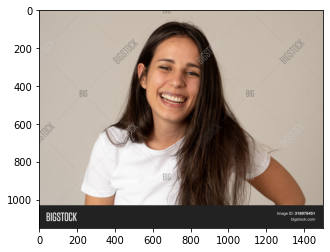

In [ ]:
#partie exemple
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  # sert a afficher l'image en couleur sans la ligne bizare en haut
plt.show()   #enleve la ligne <matplotlib.image.AxesImage at 0x7f55fd28a3a0> en haut de l'image

In [ ]:
#partie vrai code
for image_class in os.listdir(data_dir):  #nous parcouron tout les dossier qui sont dans le dossier que data_dir represente
    for image in os.listdir(os.path.join(data_dir, image_class)):#toute les photo ou élément dans le dossier vont être parcouru
        image_path = os.path.join(data_dir, image_class, image)  #on saisie individuellment chaque image pour effectuer un par try par la suite 
        try: 
            img = cv2.imread(image_path)  #chargement de l'image dans openCV   #Attention cela doit être au format soit jpeg, jpg, bmp, png
                                          #sert a mettre une image sous format de tableau numphy bref un mega tableau array remplie de chiffre par image
            tip = imghdr.what(image_path)   #sert a supprimer une image qui n'est pas valide 
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)    #va supprimer l'image si elle nest pas valide
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/gdrive/MyDrive/ClassificateurDimageCNN2/PersonneHeureuse/48507408-notion-d-C3A2ge-et-de-personnes-heureuse-femme-senior-souriante-C3A0-la-maison.jpg
Image not in ext list /content/gdrive/MyDrive/ClassificateurDimageCNN2/PersonneHeureuse/rsonnes-des-C3A9motions-et-du-visage-visage-heureux-jeune-homme-souriant-ave.jpg
Image not in ext list /content/gdrive/MyDrive/ClassificateurDimageCNN2/PersonneHeureuse/58060499-notion-d-C3A2ge-et-de-personnes-heureux-visage-de-femme-senior-souriante-C3A0-la-maison.jpg
Image not in ext list /content/gdrive/MyDrive/ClassificateurDimageCNN2/PersonneHeureuse/31858909287_8bcb62ccde_b.jpg
Image not in ext list /content/gdrive/MyDrive/ClassificateurDimageCNN2/PersonneHeureuse/depositphotos_291022996-stock-photo-face-of-happy-smiling-young.jpg
Image not in ext list /content/gdrive/MyDrive/ClassificateurDimageCNN2/PersonneHeureuse/depositphotos_32425933-Portrait-of-a-handsome-young-man-with-beard-smiling.jpg
Image not in ext list 

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

**3. Charger les données**

In [ ]:
#partie vrai code
import numpy as np
from matplotlib import pyplot as plt

Cette ligne fait plusieur action automatique lier au traitement des image en ajoutant les ?? en fin de methode permet de savoir la configuration par defaut elle a. Par exemple elle redimension les image en format 256*256

In [ ]:
#partie vrai code
data = tf.keras.utils.image_dataset_from_directory(data_dir) #c'est la quon charge les donnée
#tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=16)  #exemple de si on voudrait faire une modification à la fonction automatique
# bref il faut aller dans  data = tf.keras.utils.image_dataset_from_directory?? pour avoir les attributs modifiables

Found 902 files belonging to 4 classes.


C'est ici qu'on charge les données. Keras a un fonction automatique de pipeline de donnée. image_dataset_from_directory va créer un ensemble de données d'image dans ce cas à la volée afin qu'on n'est pas besoin de créer des étiquette. Cela va aussi faire d'autre prétraitement dont le redimenssion d'image. Cette ligne sert a avoir de l'information sur le prétraitement data = tf.keras.utils.image_dataset_from_directory??

In [ ]:
#partie vrai code
data_iterator = data.as_numpy_iterator()  #Si on veut jetter un oeil au donnée il faut les mettre sous forme d'iterateur numpy
# cest a cause que c un générateur a la voler sa laire qui faut faire cela pour recuperer les information

In [ ]:
#partie vrai code
# Get another batch from the iterator
batch = data_iterator.next()  #va nous ramener un autre lots ou batch de donnée a traiter

bref batch[0] c le tableau numpy et batch[1] c les étiquette

Note: batch[0] c les image sous format de tableau numpy et batch[1] c les étiquette


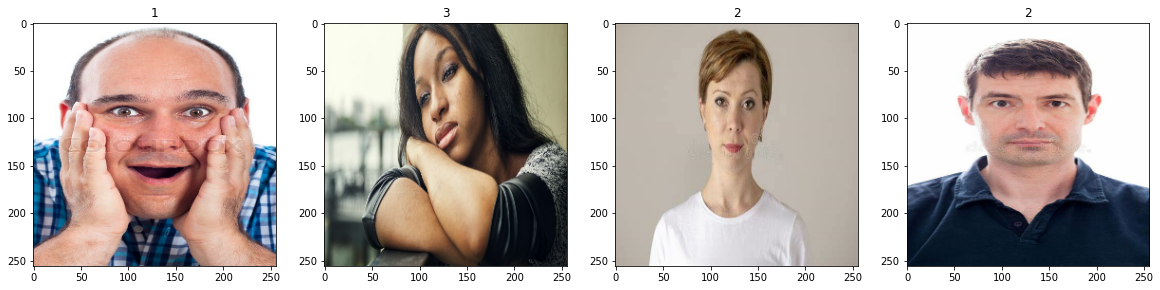

In [ ]:
#partie vrai code
fig, ax = plt.subplots(ncols=4, figsize=(20,20))  #utilisation de la fonction sous-parcelles de matplotlib pour pouvoir tracer quatre images à un moment donner
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

A partir d'ici les donnée sont charger la prochaine étape est le pré-traitement

**PARTIE PRÉTRAITEMENT**

**4. Mettre les données à échelle**

mettre les valeur sur 1 ou 255 (un des deux j'ai po trop comprit) sa permet au modèle a apprendre plus rapidement et en général donne de meilleur résultat

In [ ]:
#partie vrai code
data = data.map(lambda x,y: (x/255, y)) #utlitisation de la fonction map pour effectuer un type particulier de transformation pour
# accélérer la rapiditer avec laquelle nous pouvons accéder à nos données à partir de notre disque 
#lambda sert a pouvoir faire cette transformation
# x remprésente les image et y les étiquettes
#Attention les images et les étiquette sont dans data. batch les a contenu que temporairement

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


À l'interieur du pipelin de donné (variable "data") on va appelé la fonction map. Cette fonction nous permet d'appliquer un type particulier de transformation. Cette transformation va accélérer la rapiditer avec laquelle nous pouvons accéder à nos données à partir de notre disque . La fonction lambda sert a pouvoir faire cette transformation. Bref Si j'ai bien comprit x remprésente les image et y les étiquettes. Cela va aussi changer l'ordre des donnée je croie

INFO: il y a des tonne de transformation qu'on peut faire a notre modèle. sur google ya tf.data: Build TensorFlow input pipelins dans video c a 37:25 qui le montre


In [ ]:
#partie vrai code
data.as_numpy_iterator().next()   #comme à la partie 31 du colab je crois qu'il le met sous tableau numpy
# Cela permet aussi de voir que l'ordre des donnée n'est pas la même si on rexecute le code

sert a voir l'allure des tableau numpy et sassurer qu'il on des valeur de 0 a 1 Les deux ligne exemple montre comment voir la valeur min et max de c'est tableau

In [ ]:
#partie exemple
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].min() #retourne la valeur maximum du tableau
#Si cela ne retourne pas 0.0 cela indique qu'il y a une problème.

0.0

In [ ]:
#partie exemple
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].max() #retourne la valeur maximum du tableau
#Si cela ne retourne pas 1.0 cela indique qu'il y a une problème.
#En recomencant le code cela semble regler le probleme
# 0.0  à 1.0 représente les valeur possible des image.
# 0.0 à 0.5 représente une personne heureuse
# 0.5 à 1.0 représente une personne triste

1.0

**5. Fractionner les données**

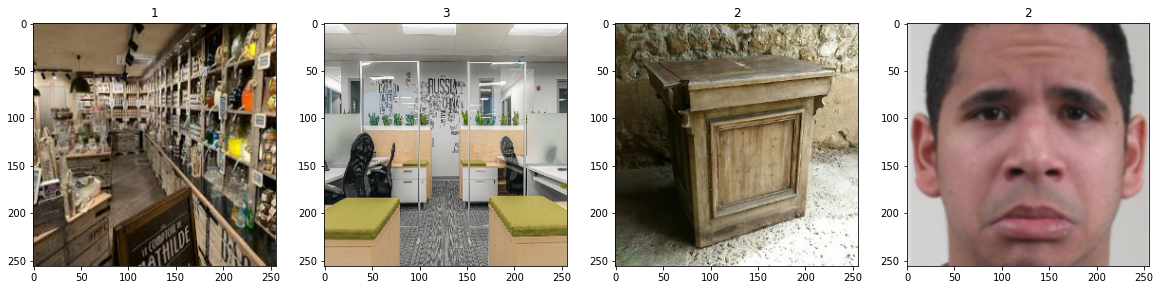

In [ ]:
#partie exemple
#je pense que sa sert a voir que nos image sont diférent a chaquune des batch
batch2 = scaled_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch2[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

je pense que sa sert a voir que nos image sont diférent a chaquune des batch

In [ ]:
#partie exemple
len(data)


29

Le nombre afficher ici signie le nombre de lot. Ici il 6 lots. Je crois que c'est 6 lots de 32 image. Si cela serai un nombre impair cela signifirait qu'un des lots serais tronquer Attention partie important. Un calcule selon le nombre d'image ou de lots semble néssesaire pour avoir un modèle performent

In [ ]:
#partie exemple
6*.2

1.2000000000000002

In [ ]:
#partie exemple
6*.1

0.6000000000000001

In [ ]:
#partie vrai code
train_size = int(len(data)*.7)   #sert à ce que notre modèle ne soit pas sur-ajusté
                                #train_size représente les donner d'entrainement
val_size = int(len(data)*.2) +1  #val_size représente les donner de validation. Son utiliser pour evaluer le modèle pendant que nous l'entrainons
#cela signifie que notre modèle n'a pas nésserement vu notre partition de validation mais nous l'utilison pour affiner la façon dont nous construisons réellement ce modèle d'apprentissage en profondeur.
#entrainez-vous à  avoir un partition d'entrainement et de validation
test_size = int(len(data)*.1) +1  #test_size représente les donner test

Zone important c'est ici qu'on ajuste les valeur pour que le code "len(data)" equivaut a "train_size+val_size+test_size"

C'est ligne serve a établir la quantité de donner que nous allons allouer à chaqune de ces partitions

train_size = les donner d'entrainement.

val_size = les donner de validation.

test_size = les donner test.


In [ ]:
#partie exemple
train_size+val_size+test_size
# doit equivaleur a  len(data) pour que le modèle soit performent 
#note sa marche pareil si c pas ajuster mais c po l'ideal

29

Si ici vous n'avez pas la même valeur que lors de cette ligne "len(data)" votre modèle ne sera pas optimal lors de l'entrainement sa va surment marché mais c'est pas optimal.

In [ ]:
#partie exemple
train_size

20

In [ ]:
#partie exemple
val_size

6

In [ ]:
#partie exemple
test_size  #retourne la taille de notre test

3

Le but de cela est que la valeur du code "len(data)" soit equialent au code "train_size+val_size+test_size"

In [ ]:
#partie vrai code
train_size

20

In [ ]:
#partie vrai code
train = data.take(train_size)  # le train est egal à la prise de donner avec le nombre de lot de que nous allons allouer a nos donner de formation
#gardé à l'esprit que no donner sont déjà mélanger. Si vos données n'avait pas été mélangé il faudrait les mélanger avant de faire cela
#donc le train va être égal a 4 lot donc le train est égal à la prise de points données, puis à cela, nous traversons la taille du train val va être égal au saut de points de données, alors d'abord quoi nous allons
# faire est de sauter les lots que nous avons déjà alloués à notre partition de formation, puis nous allon prendre les deux derniers dans nos données de valve afin que les données sautent et nous allons
# sauter le premier quatre que nous avons alloués à la formation, puis nous allons en prendre deux basé sur la taille de la voyelle, prenez-en deux puis nous allons prendre deux lots et c'est à quoi ressemblera notre 
# rendu  a 46.25
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Sa peut quil il est une erreur ici si la zone important un peu plus haut n'est pas correcte

**6. Construire un modèle d'apprentissage en profondeur**

In [ ]:
#partie vrai code
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#partie vrai code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#partie vrai code
model = Sequential()

In [ ]:
#partie vrai code
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#partie vrai code
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#partie vrai code
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**7. entraîner**

In [ ]:
#partie vrai code
logdir='logs'   #note le faire a un autre emplacement sa vient s'ajouter au dossier happy et sad au Début c qui fuck le truc si on réentraine le model
# le créer a un autre endroit pour éviter quon prenne ce dossier pour un dossier avec des photo  pour l'entrainement

In [ ]:
#partie vrai code
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#partie vrai code
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
20/20 [==============================] - 40s 2s/step - loss: -82026416.0000 - accuracy: 0.3531 - val_loss: -103882584.0000 - val_accuracy: 0.2812
Epoch 2/40
20/20 [==============================] - 36s 2s/step - loss: -94932496.0000 - accuracy: 0.3688 - val_loss: -113808968.0000 - val_accuracy: 0.4271
Epoch 3/40
20/20 [==============================] - 39s 2s/step - loss: -134646048.0000 - accuracy: 0.3781 - val_loss: -136620544.0000 - val_accuracy: 0.2604
Epoch 4/40
20/20 [==============================] - 39s 2s/step - loss: -167101584.0000 - accuracy: 0.3750 - val_loss: -164990224.0000 - val_accuracy: 0.4115
Epoch 5/40
20/20 [==============================] - 39s 2s/step - loss: -186921888.0000 - accuracy: 0.3844 - val_loss: -232102736.0000 - val_accuracy: 0.3698
Epoch 6/40
20/20 [==============================] - 35s 2s/step - loss: -273418688.0000 - accuracy: 0.3719 - val_loss: -210365744.0000 - val_accuracy: 0.3802
Epoch 7/40
20/20 [==============================] - 38

In [ ]:
#partie exemple
hist.history

{'loss': [-82026416.0,
  -94932496.0,
  -134646048.0,
  -167101584.0,
  -186921888.0,
  -273418688.0,
  -347824768.0,
  -430904064.0,
  -512616352.0,
  -563178112.0,
  -729084288.0,
  -784092288.0,
  -977258112.0,
  -1096832640.0,
  -1256385792.0,
  -1508940416.0,
  -1817254656.0,
  -2039900544.0,
  -2288023040.0,
  -2923383808.0,
  -2854071296.0,
  -3153539072.0,
  -4093228544.0,
  -4278095104.0,
  -5327934464.0,
  -5642813952.0,
  -5774306304.0,
  -6714630656.0,
  -7289307136.0,
  -8900228096.0,
  -9359362048.0,
  -12490520576.0,
  -11924838400.0,
  -13008495616.0,
  -14123095040.0,
  -19110619136.0,
  -17506150400.0,
  -18152835072.0,
  -19871119360.0,
  -21137623040.0],
 'accuracy': [0.3531250059604645,
  0.3687500059604645,
  0.37812501192092896,
  0.375,
  0.3843750059604645,
  0.37187498807907104,
  0.375,
  0.359375,
  0.37812501192092896,
  0.38749998807907104,
  0.3656249940395355,
  0.375,
  0.37968748807907104,
  0.3812499940395355,
  0.3968749940395355,
  0.385937511920928

**8. Performances du tracé ou Plot Performance**

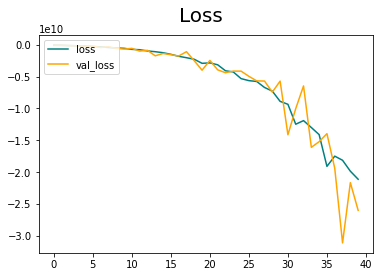

In [ ]:
#partie vrai code
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

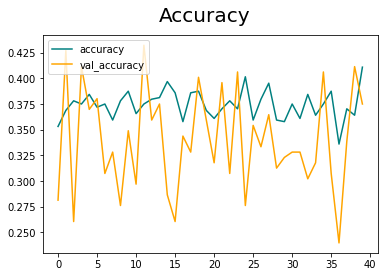

In [ ]:
#partie vrai code
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**9. Évaluer le modèle**

In [ ]:
#partie vrai code
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
#partie vrai code
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
#partie vrai code
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 77ms/step


In [ ]:
#partie vrai code
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.65, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.37142858, shape=(), dtype=float32)


**10. Test**

In [ ]:
#partie vrai code
import cv2

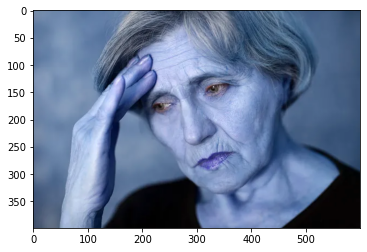

In [ ]:
#partie vrai code

#img = cv2.imread('154006829.jpg')
img = cv2.imread(os.path.join('/content/gdrive/MyDrive/TestClassificationImage/test1Sad.jpg'))   #mettre un image test qui ne sait pas entrainer avec
plt.imshow(img)
plt.show()

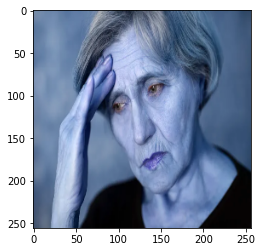

In [ ]:
#partie vrai code
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
#partie vrai code
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [ ]:
#partie vrai code
yhat

array([[1.]], dtype=float32)

['PersonneHeureuse', 'PersonneTriste', 'PersonneNeutre', 'AbsencePersonne']

Ne marche pas.

 tu a fait un entrainement de 40 epoque mais il reconnait les images

In [ ]:
#partie vrai code
if yhat < 0.5: 
    print(f'Predicted class is PersonneHeureuse')
else :
    print(f'Predicted class is PersonneTriste')


Predicted class is PersonneTriste


**11. Enregistrer le modèle**

In [ ]:
#partie vrai codef
rom tensorflow.keras.models import load_model

In [ ]:
#partie vrai code
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
#partie code conversion en tensorflowlite pour une utilisation android
#recuperer sur un autre code 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
#partie vrai code
new_model = load_model('imageclassifier.h5')

In [ ]:
#partie vrai code
new_model.predict(np.expand_dims(resize/255, 0))